In [ ]:
import kagglehub
from google.colab import drive
import shutil

# Nesta parte armazenamos a planilha de dados escolhida
# no Google Drive do usuário

# Montando o local de download
drive.mount('/content/drive')
dest_path = "/content/drive/MyDrive/EST/Trabalho01"

# Baixa a versão mais recente dos dados
path = kagglehub.dataset_download("mohamedtag04/egypt-network-performance-data-q4-2023")

# Copiar os arquivos
shutil.copytree(path, dest_path)
print("Path to dataset files:", path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileExistsError: [Errno 17] File exists: '/content/drive/MyDrive/EST/Trabalho01'

In [ ]:
!pip install geopandas
!pip install geopy
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install leafmap mapclassify
!pip geodesic

In [ ]:
#importando bibliotecas
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import leafmap.foliumap as leafmap
import folium

from geopy.distance import geodesic



O dataframe possui as seguintes caracteristicas:

* avg_d_kbps

    Velocidade média de download em quilobits por segundo.

* avg_u_kbps
    
    Velocidade média de upload em quilobits por segundo.


* avg_lat_ms
    
    Latência média em milissegundos, indicando a capacidade de resposta da rede.


* tests
    
    Número de testes realizados, fornecendo informações sobre o volume de pontos de dados.


* dispositivos

    Número de dispositivos usados ​​nos testes, oferecendo insights de diversidade.


* centroide_lat
    
    Coordenada de latitude do centroide geográfico da localização da rede.


* centróide_lon

    Coordenada de longitude do centroide geográfico da localização da rede.


* cidade

    Nome da cidade associada aos dados de desempenho da rede.


* velocidade_avg_mbps

    Velocidade média de download convertida em megabits por segundo para maior conveniência.


* velocidade_média_u_mbps

    Velocidade média de upload convertida em megabits por segundo para maior conveniência.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Caminho onde os dados já estão salvos
dest_path = "/content/drive/MyDrive/EST/Trabalho01"

# Ler direto do arquivo salvo
import pandas as pd

df = pd.read_csv(dest_path + "/network performance.csv")
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,centroid_lat,centroid_lon,city,avg_d_speed_mbps,avg_u_speed_mbps
0,0,91528,94732,4,1,1,27.569156,27.567444,Qaşr al Farāfirah,91.528,94.732
1,1,76459,64054,17,1,1,27.134924,27.924500,Qaşr al Farāfirah,76.459,64.054
2,2,24891,15299,13,7,3,27.061572,27.875061,Qaşr al Farāfirah,24.891,15.299
3,3,36193,56719,14,4,2,27.066463,27.891541,Qaşr al Farāfirah,36.193,56.719
4,4,101906,80136,11,10,2,27.061572,27.891541,Qaşr al Farāfirah,101.906,80.136


## Plotando Mapas para observar a localização dos doados


In [ ]:
from shapely.geometry import Point

# Pega os dados de locali~ão das amostras
data_geo = df[['centroid_lat', 'centroid_lon', 'city']].copy()

# Transformando em coordenadas geograficas
data_geo['geometry'] = gpd.points_from_xy(data_geo['centroid_lon'], data_geo['centroid_lat'])

# Converte para um GeoDataFrame
geo_df = gpd.GeoDataFrame(data_geo, geometry="geometry")
print(geo_df.head())


   centroid_lat  centroid_lon               city                   geometry
0     27.569156     27.567444  Qaşr al Farāfirah  POINT (27.56744 27.56916)
1     27.134924     27.924500  Qaşr al Farāfirah   POINT (27.9245 27.13492)
2     27.061572     27.875061  Qaşr al Farāfirah  POINT (27.87506 27.06157)
3     27.066463     27.891541  Qaşr al Farāfirah  POINT (27.89154 27.06646)
4     27.061572     27.891541  Qaşr al Farāfirah  POINT (27.89154 27.06157)


In [ ]:
df.head()
df.info()
df.describe(include='object')  # Para dados categóricos e texto
df.columns  # Ver quais colunas existem


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17871 entries, 0 to 17870
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17871 non-null  int64  
 1   avg_d_kbps        17871 non-null  int64  
 2   avg_u_kbps        17871 non-null  int64  
 3   avg_lat_ms        17871 non-null  int64  
 4   tests             17871 non-null  int64  
 5   devices           17871 non-null  int64  
 6   centroid_lat      17871 non-null  float64
 7   centroid_lon      17871 non-null  float64
 8   city              17871 non-null  object 
 9   avg_d_speed_mbps  17871 non-null  float64
 10  avg_u_speed_mbps  17871 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 1.5+ MB


Index(['Unnamed: 0', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests',
       'devices', 'centroid_lat', 'centroid_lon', 'city', 'avg_d_speed_mbps',
       'avg_u_speed_mbps'],
      dtype='object')

In [ ]:
# Tabela 1:
# Calcula estatísticas de cada coluna do conjunto
df.describe()


,Unnamed: 0,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,centroid_lat,centroid_lon,avg_d_speed_mbps,avg_u_speed_mbps
count,17871.000000,17871.000000,17871.000000,17871.000000,17871.000000,17871.000000,17871.000000,17871.000000,17871.000000,17871.000000
mean,8935.000000,24320.552739,9353.365285,37.065637,42.168653,11.246936,30.253199,31.245289,24.320553,9.353365
std,5159.057666,39175.021429,22929.843534,72.937887,140.815593,102.817435,0.685185,0.409037,39.175021,22.929844
min,0.000000,4.000000,4.000000,0.000000,1.000000,1.000000,24.674474,27.567444,0.004000,0.004000
25%,4467.500000,9288.000000,1275.000000,13.000000,2.000000,1.000000,30.004895,30.989685,9.288000,1.275000
50%,8935.000000,16839.000000,2928.000000,21.000000,7.000000,2.000000,30.299389,31.231384,16.839000,2.928000
75%,13402.500000,24440.000000,5192.500000,35.000000,31.000000,8.000000,30.696973,31.451111,24.440000,5.192500
max,17870.000000,791794.000000,491476.000000,2456.000000,13422.000000,13311.000000,31.524703,33.192444,791.794000,491.476000


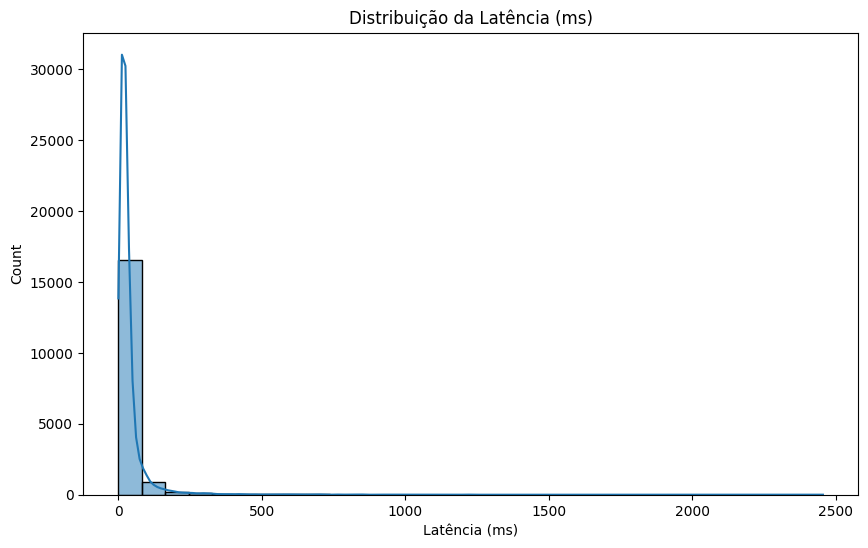

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grafico 1:
# Plota o histograma de latência com os outliers


plt.figure(figsize=(10,6))
sns.histplot(df['avg_lat_ms'], kde=True, bins=30)
plt.title('Distribuição da Latência (ms)')
plt.xlabel('Latência (ms)')
plt.show()


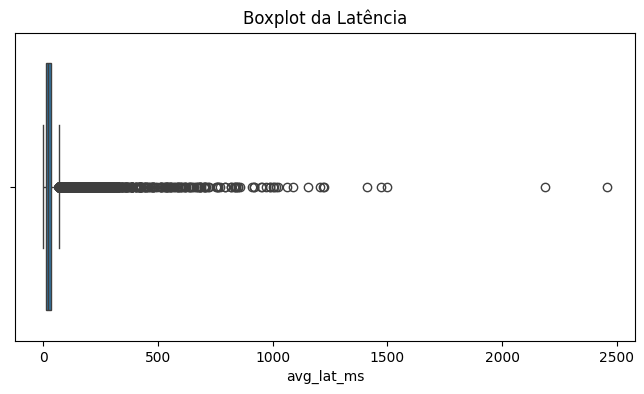

In [ ]:

# Grafico 2:
# Plota o boxplot da latência

plt.figure(figsize=(8,4))
sns.boxplot(x=df['avg_lat_ms'])
plt.title('Boxplot da Latência')
plt.show()


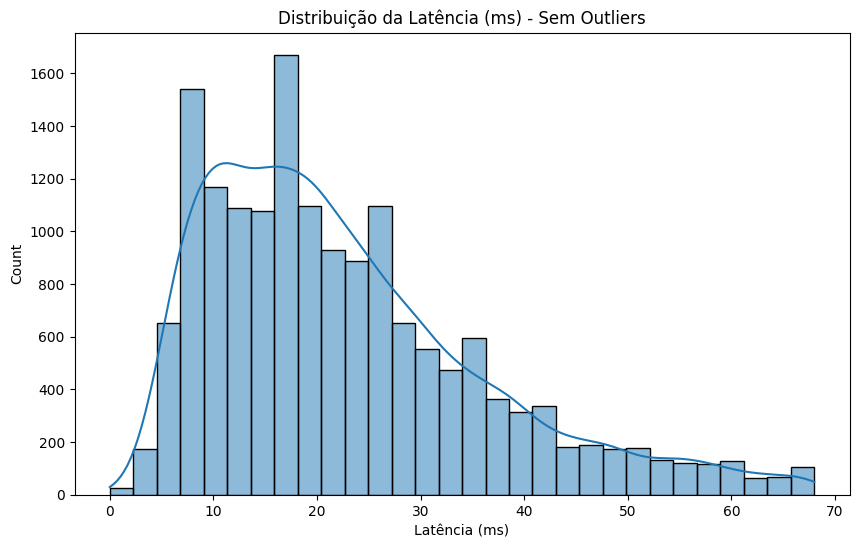

In [ ]:
# Grafico 3:
# Histograma de latência sem outliers

# Calcula os limites do boxplot
q1 = df['avg_lat_ms'].quantile(0.25)
q3 = df['avg_lat_ms'].quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Filtra os dados removendo os outliers
df_sem_outliers = df[(df['avg_lat_ms'] >= limite_inferior) & (df['avg_lat_ms'] <= limite_superior)]


plt.figure(figsize=(10,6))
sns.histplot(df_sem_outliers['avg_lat_ms'], kde=True, bins=30)
plt.title('Distribuição da Latência (ms) - Sem Outliers')
plt.xlabel('Latência (ms)')
plt.show()

In [ ]:
import folium
from folium.plugins import HeatMap


# Define o mapa
# Centraliza o mapa a partir da média de todos os centroides dados

m = folium.Map(
    location=[df['centroid_lat'].mean(), df['centroid_lon'].mean()],
    zoom_start=6,
    tiles='CartoDB positron'  # Tiles em inglês, limpo e leve
)

# Cria uma lista de listas que contem os dados dos centroides
# das cidades e latencia media em cada um
heat_data = [
    [row['centroid_lat'], row['centroid_lon'], row['avg_lat_ms']]
    for index, row in df.iterrows() if not pd.isnull(row['avg_lat_ms'])
]

# Plota o heatmap a partir dos dados de heat_data
# em cima do mapa m
HeatMap(heat_data, radius=10).add_to(m)

m


##Analisando Latencia por Cidades
Gera um agrupamento dos dados de latencia a partir da cidades egipcias e descreve alguns marcadores importantes

count → quantidade de registros

mean → média

std → desvio padrão

min → menor valor

25% → primeiro quartil

50% → mediana

75% → terceiro quartil

max → maior valor

In [ ]:
# Delimita dados para apenas latencia e cidade
lat_city = df[['city','avg_lat_ms']]
lat_city

,city,avg_lat_ms
0,Qaşr al Farāfirah,4
1,Qaşr al Farāfirah,17
2,Qaşr al Farāfirah,13
3,Qaşr al Farāfirah,14
4,Qaşr al Farāfirah,11
...,...,...
17866,Al Khārjah,22
17867,Al Khārjah,14
17868,Al Khārjah,28
17869,Al Khārjah,59


In [ ]:
# Agrupa dados por cidade, calculando instâncias,
# média, desvio padrão, mínimo, Q1, mediana, Q3, e máximo
lat_city = df.groupby('city')['avg_lat_ms'].describe().sort_values(by='mean', ascending=False)
lat_city

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Ra’s Ghārib,11.0,130.454545,363.228678,9.0,10.00,12.0,30.50,1224.0
Rosetta,2.0,89.500000,92.630988,24.0,56.75,89.5,122.25,155.0
Al Qūşīyah,7.0,68.857143,49.113571,20.0,29.00,45.0,110.00,139.0
Qufādah,70.0,59.342857,66.773657,7.0,23.00,33.0,62.50,306.0
Banī ‘Ubayd,45.0,57.600000,135.024139,0.0,18.00,26.0,37.00,820.0
...,...,...,...,...,...,...,...,...
Madīnat as Sādis min Uktūbar,724.0,22.182320,32.721591,1.0,8.00,15.0,25.00,597.0
Sidmant al Jabal,63.0,21.238095,17.128277,6.0,10.00,16.0,26.00,86.0
Qaşr al Farāfirah,13.0,20.692308,16.799725,4.0,13.00,14.0,19.00,69.0


In [ ]:
# Acha a cidade de mais registros e a quantidade
cidade_mais_registros = lat_city['count'].idxmax()
quantidade = lat_city['count'].max()

print(f'A cidade com mais registros é {cidade_mais_registros} com {quantidade} registros.')

# Acha a cidade de menos registros e a quantidade
cidade_menos_registros = lat_city['count'].idxmin()
quantidade_min = lat_city['count'].min()

print(f'A cidade com mais registros é {cidade_menos_registros} com {quantidade_min} registros.')


A cidade com mais registros é Cairo com 1586.0 registros.
A cidade com mais registros é Maţāy com 1.0 registros.


In [ ]:
# Função para calcular distância entre dois pontos geográficos

def calcular_distancia(cidade1, cidade2, dataframe):

    # Procura os nomes de cidades dados e devolve os centroides delas
    coord1 = dataframe[dataframe['city'] == cidade1][['centroid_lat', 'centroid_lon']].iloc[0]
    coord2 = dataframe[dataframe['city'] == cidade2][['centroid_lat', 'centroid_lon']].iloc[0]

    # Utiliza da função de distancia em quilômetros do geodesic
    return geodesic((coord1['centroid_lat'], coord1['centroid_lon']), (coord2['centroid_lat'], coord2['centroid_lon'])).kilometers


In [ ]:
calcular_distancia(cidade_mais_registros, cidade_menos_registros, data_geo)

187.4849729254773

pltando um histograma da distribuição de latencia por cidade

array([[<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'mean'}>,
        <Axes: title={'center': 'std'}>],
       [<Axes: title={'center': 'min'}>, <Axes: title={'center': '25%'}>,
        <Axes: title={'center': '50%'}>],
       [<Axes: title={'center': '75%'}>, <Axes: title={'center': 'max'}>,
        <Axes: >]], dtype=object)

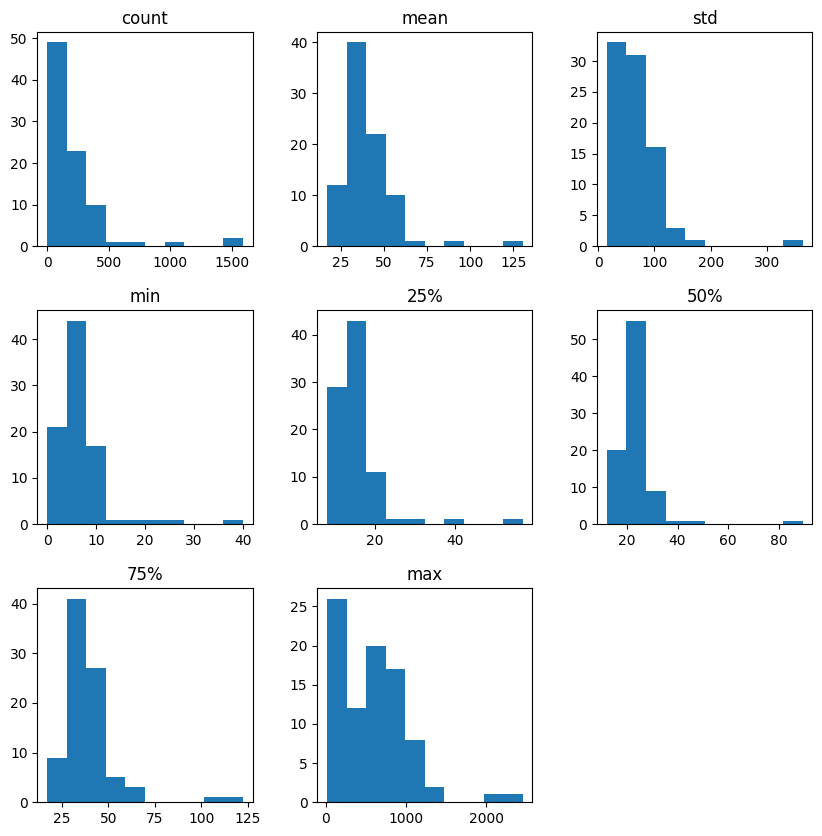

In [ ]:
# Histograma da distribuição de latencia por cidade,
# para diversas estatísticas
lat_city.hist(grid=False, figsize=(10,10))

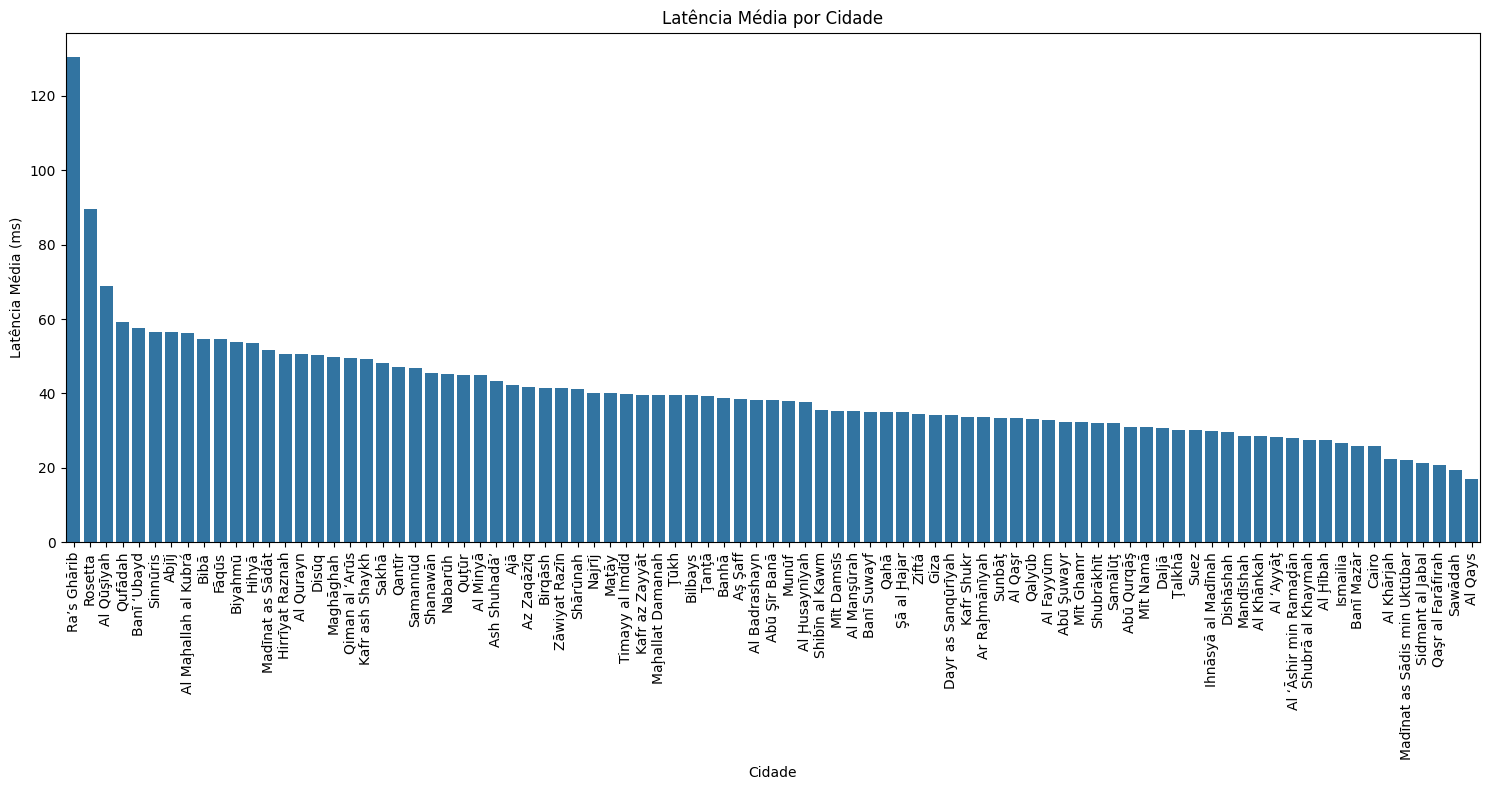

In [ ]:
# Calcula a latência média por cidade
latencia_media_por_cidade = df.groupby('city')['avg_lat_ms'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x=latencia_media_por_cidade.index, y=latencia_media_por_cidade.values)
plt.xticks(rotation=90) # Rota os rótulos do eixo x para melhor legibilidade
plt.title('Latência Média por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Latência Média (ms)')
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

## Analisando a velocidades de upload e downloads

In [ ]:
# Criando um sub-dataframe que armazena as médias de download (avg_d_kbps) e upload (avg_u_kbps) por cidade
city_speeds_description = df.groupby('city')[['avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms']].mean()

# Ordenando as cidades pela média de velocidade de download (avg_d_kbps) em ordem decrescente
veloc_avgs = city_speeds_description.sort_values(by='avg_d_kbps', ascending=False)

# Exibindo o dataframe ordenado, com as cidades e suas respectivas velocidades médias de download e upload
veloc_avgs


,avg_d_kbps,avg_u_kbps,avg_lat_ms
city,,,
Al ‘Āshir min Ramaḑān,53015.560976,26629.715122,27.967805
Abū Şuwayr,50477.116883,28952.071429,32.376623
Madīnat as Sādis min Uktūbar,42184.595304,21802.396409,22.182320
Al Khānkah,41977.871438,19403.220676,28.491054
Cairo,38958.408575,18492.764817,25.757251
...,...,...,...
Shārūnah,7847.800000,1756.560000,41.280000
Al Qūşīyah,3483.428571,1284.000000,68.857143
Maţāy,2678.000000,552.000000,40.000000


In [ ]:
veloc_avgs.describe()

,avg_d_kbps,avg_u_kbps,avg_lat_ms
count,87.000000,87.000000,87.000000
mean,17539.398958,5642.901252,40.118131
std,8975.831068,5994.515904,15.230042
min,852.000000,278.000000,17.000000
25%,13202.769145,2606.798795,31.520468
50%,15605.342365,3409.555556,38.189655
75%,18874.963517,5673.755522,46.166360
max,53015.560976,31253.384615,130.454545


array([[<Axes: title={'center': 'avg_d_kbps'}>,
        <Axes: title={'center': 'avg_u_kbps'}>],
       [<Axes: title={'center': 'avg_lat_ms'}>, <Axes: >]], dtype=object)

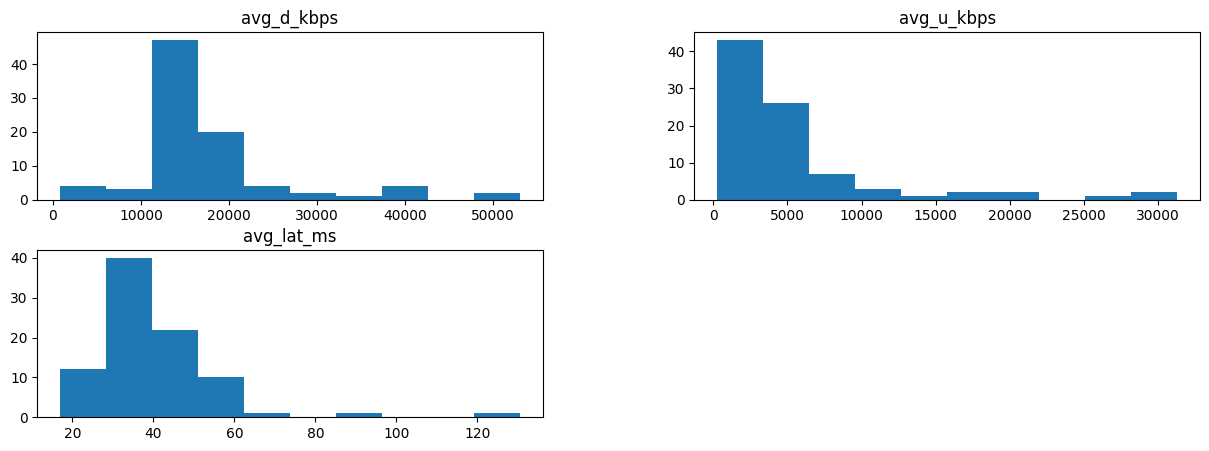

In [ ]:
# Histogramas de velocidade média de download, upload e latência média
veloc_avgs.hist(grid=False, figsize=(15,5))

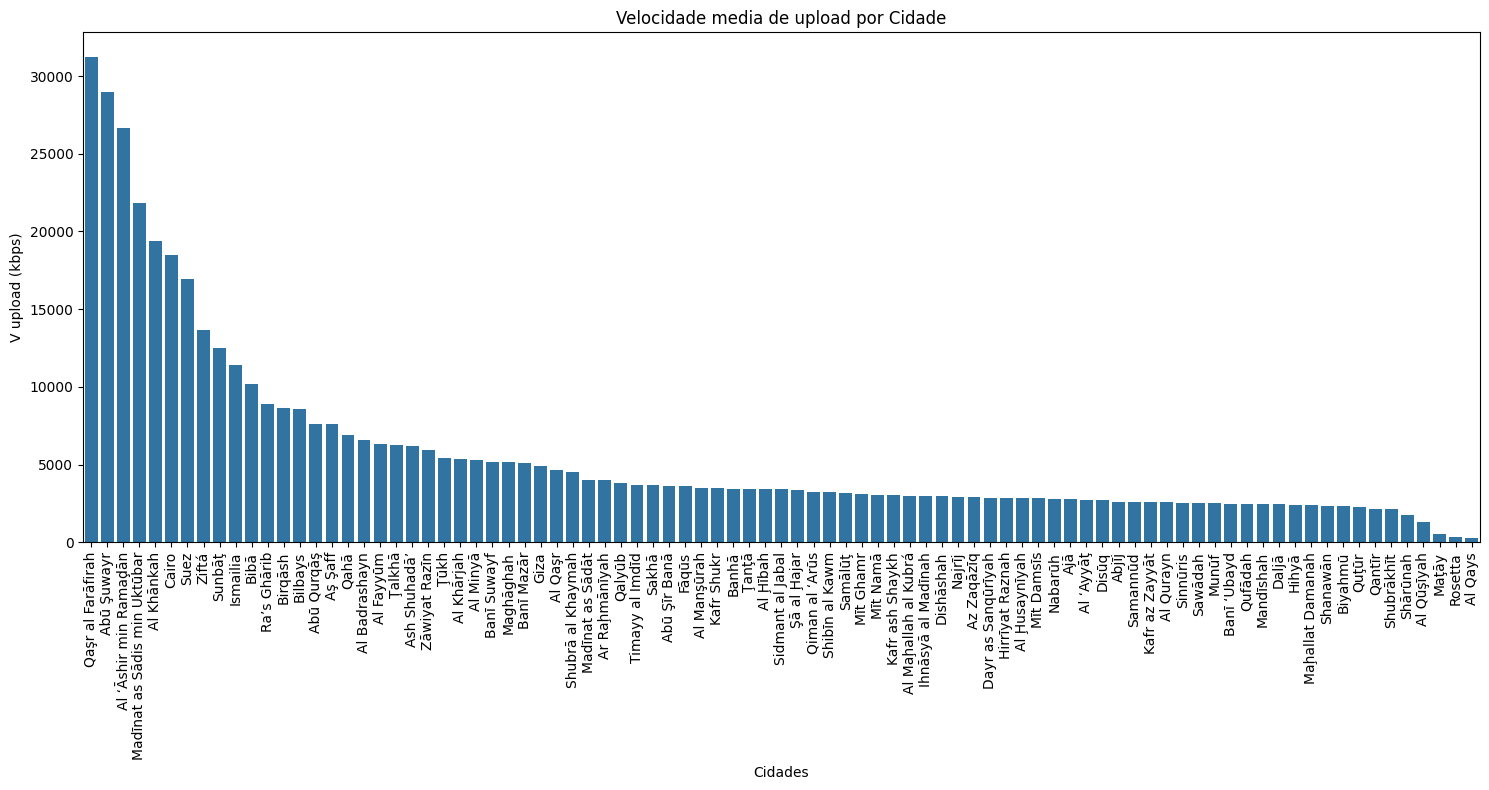

In [ ]:
# Calcula a velocidades média de upload por cidade
velu_media_por_cidade = veloc_avgs.groupby('city')['avg_u_kbps'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x=velu_media_por_cidade.index, y=velu_media_por_cidade.values)
plt.xticks(rotation=90) # Rota os rótulos do eixo x para melhor legibilidade
plt.title('Velocidade media de upload por Cidade')
plt.xlabel('Cidades')
plt.ylabel('V upload (kbps)')
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

In [ ]:
velu_media_por_cidade

,avg_u_kbps
city,
Qaşr al Farāfirah,31253.384615
Abū Şuwayr,28952.071429
Al ‘Āshir min Ramaḑān,26629.715122
Madīnat as Sādis min Uktūbar,21802.396409
Al Khānkah,19403.220676
...,...
Shārūnah,1756.560000
Al Qūşīyah,1284.000000
Maţāy,552.000000


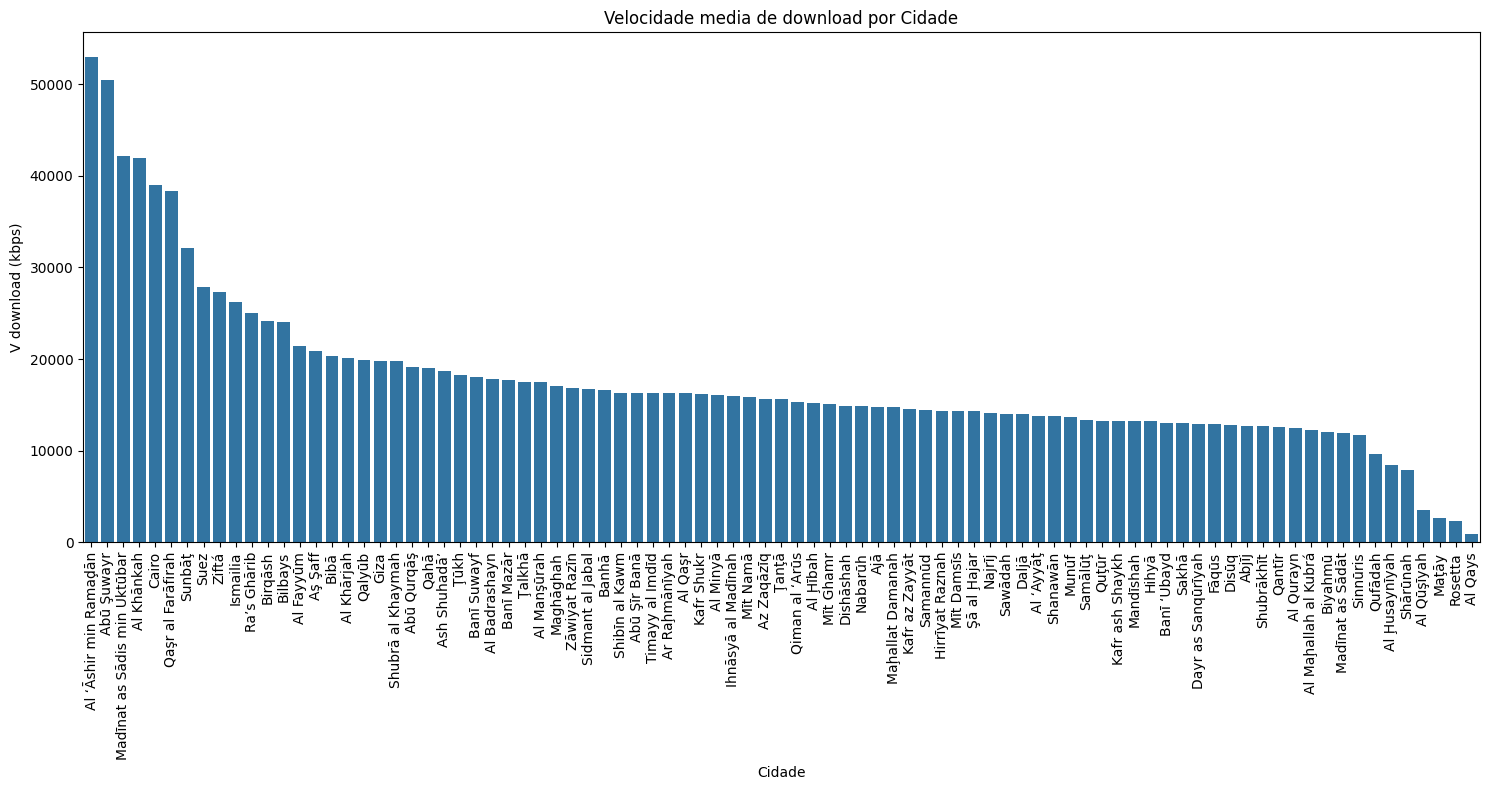

In [ ]:
# Calcula a latência média por cidade
veld_media_por_cidade = veloc_avgs.groupby('city')['avg_d_kbps'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(x=veld_media_por_cidade.index, y=veld_media_por_cidade.values)
plt.xticks(rotation=90) # Rota os rótulos do eixo x para melhor legibilidade
plt.title('Velocidade media de download por Cidade')
plt.xlabel('Cidade')
plt.ylabel('V download (kbps)')
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

* velocidades por cidades

In [ ]:
vel_max = veloc_avgs['avg_d_kbps'].max()
cidade_mais_rapida = veloc_avgs['avg_d_kbps'].idxmax()

vel_min = veloc_avgs['avg_d_kbps'].min()
cidade_mais_lenta = veloc_avgs['avg_d_kbps'].idxmin()


print(f'A cidade com velocidade mais rápida é {cidade_mais_rapida} com {vel_max:.2f} kbps.')
print(f'A cidade com velocidade mais lenta é {cidade_mais_lenta} com {vel_min:.2f} kbps.')

A cidade com velocidade mais rápida é Al ‘Āshir min Ramaḑān com 53015.56 kbps.
A cidade com velocidade mais lenta é Al Qays com 852.00 kbps.


In [ ]:
df['city'].value_counts()
# Ordena do maior para o menor
veloc_avgs_sorted = veloc_avgs.sort_values(by='avg_d_kbps', ascending=False)

# Exibe as 5 primeiras
print("5 Velocidades de downloads mais rápidas:\n", veloc_avgs_sorted.head(5))


5 Velocidades de downloads mais rápidas:
                                 avg_d_kbps    avg_u_kbps  avg_lat_ms
city                                                                
Al ‘Āshir min Ramaḑān         53015.560976  26629.715122   27.967805
Abū Şuwayr                    50477.116883  28952.071429   32.376623
Madīnat as Sādis min Uktūbar  42184.595304  21802.396409   22.182320
Al Khānkah                    41977.871438  19403.220676   28.491054
Cairo                         38958.408575  18492.764817   25.757251


In [ ]:
df['city'].value_counts()
# Ordena do maior para o menor
veloc_avgs_sorted = veloc_avgs.sort_values(by='avg_u_kbps', ascending=False)

# Exibe as 5 primeiras
print("5 Velocidades de uploads mais rápidas:\n", veloc_avgs_sorted.head(5))

5 Velocidades de uploads mais rápidas:
                                 avg_d_kbps    avg_u_kbps  avg_lat_ms
city                                                                
Qaşr al Farāfirah             38395.461538  31253.384615   20.692308
Abū Şuwayr                    50477.116883  28952.071429   32.376623
Al ‘Āshir min Ramaḑān         53015.560976  26629.715122   27.967805
Madīnat as Sādis min Uktūbar  42184.595304  21802.396409   22.182320
Al Khānkah                    41977.871438  19403.220676   28.491054


## Latencia e Velocidade

Latencia é o atraso da comunicão e a velocidade é quantidades de dados transferidos por segundos

1 ou -1 -> forte relação entres as medidas

0 -> nenhuma correlação

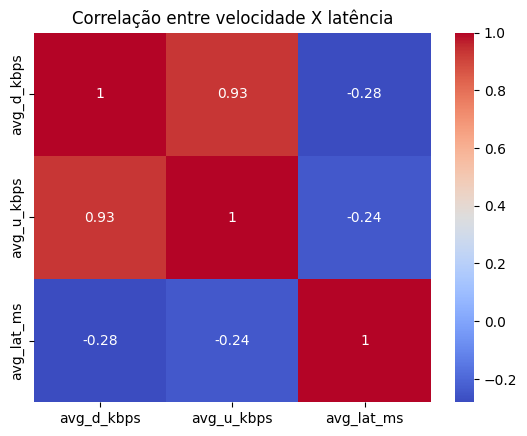

In [ ]:
corr_lat_v = veloc_avgs[['avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms']].corr()
# Plota a grafico

sns.heatmap(corr_lat_v, annot=True, cmap='coolwarm')
plt.title('Correlação entre velocidade X latência')
plt.show()